# Let's get started!

In [1]:
# Importing the required libraries for cleaning,manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# Reading and viewing the housing dataset

data=pd.read_csv(r"C:\Users\Hp\Desktop\Housing price prediction\Bengaluru_House_Data.csv")
# Converting column headers to upper case
data.columns = map(str.upper, data.columns)
data.head(15)

,AREA_TYPE,AVAILABILITY,LOCATION,SIZE,SOCIETY,TOTAL_SQFT,BATH,BALCONY,PRICE
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# Knowing our data!

In [3]:
# To see the statistics of our data
data. describe(include = 'all')

,AREA_TYPE,AVAILABILITY,LOCATION,SIZE,SOCIETY,TOTAL_SQFT,BATH,BALCONY,PRICE
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [4]:
# To see the data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA_TYPE     13320 non-null  object 
 1   AVAILABILITY  13320 non-null  object 
 2   LOCATION      13319 non-null  object 
 3   SIZE          13304 non-null  object 
 4   SOCIETY       7818 non-null   object 
 5   TOTAL_SQFT    13320 non-null  object 
 6   BATH          13247 non-null  float64
 7   BALCONY       12711 non-null  float64
 8   PRICE         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [5]:
# To see number of rows and columns 
data.shape

(13320, 9)

In [6]:
# To see the total null values for each column
data.isnull().sum()

AREA_TYPE          0
AVAILABILITY       0
LOCATION           1
SIZE              16
SOCIETY         5502
TOTAL_SQFT         0
BATH              73
BALCONY          609
PRICE              0
dtype: int64

In [7]:
# To see the different types of values in column 'SIZE'
data['SIZE'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
# Transposing the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BATH,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
BALCONY,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
PRICE,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


# Data Visualization from correlation!

In [9]:
# Finding the correlation
data.corr()

,BATH,BALCONY,PRICE
BATH,1.000000,0.204201,0.456345
BALCONY,0.204201,1.000000,0.120355
PRICE,0.456345,0.120355,1.000000


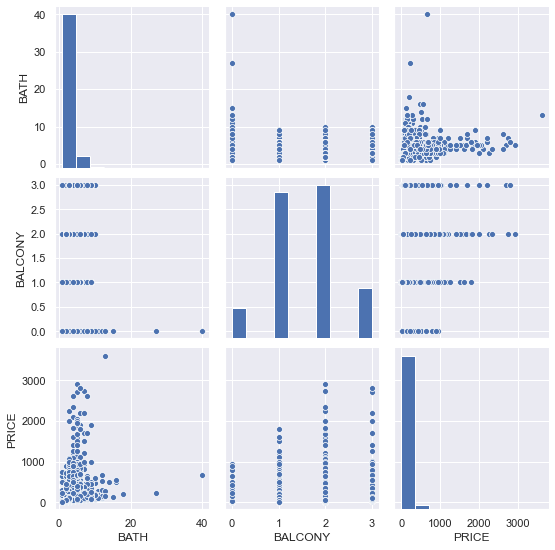

In [10]:
# To create a pairplot 
sns.set()
sns.pairplot(data)

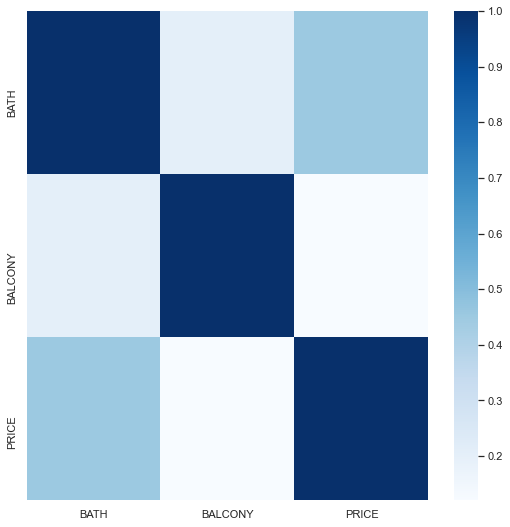

In [11]:
# Heatmap
corr=data.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,cmap="Blues")

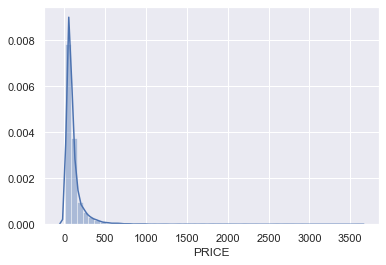

In [12]:
sns.distplot(data['PRICE'])

# Converting categorical data of all columns to numeric and replacing null values.

# A brief discussion about replacing null values!

### We need to do something about the null values. There are several popular choices when dealing with null values:
#### 1:Eliminate the rows: A great approach if null values are a very small percentage, such as 1% of the total dataset.
#### 2:Replace with a significant value, such as the median or the mean: A great approach if the rows are valuable, and the column is reasonably balanced.
#### 3:Replace with the most likely value; perhaps a 0 or 1: It's preferable to option 2 when the median might be useless. The median can often work here.
#### Consider the first column, BATH. The mean is way more than the median (50%). This indicates that the data is very right-skewed with some outliers. Indeed, you can see that the maximum of 40 is much larger than the 3 value of the 75th percentile. This makes the mean a poor replacement candidate for this column.
#### The choice depends on what you ultimately want to do with the data. If the goal is a straightforward data analysis, eliminating the rows with null values is worth consideration. However, if the goal is to use machine learning to predict data, then perhaps more is to be gained by changing the null values to a suitable replacement. It's impossible to know in advance.

In [13]:
# To keep a count of total sq.feets of area 
from collections import Counter
Counter(data['TOTAL_SQFT'])

Counter({'1056': 12,
         '2600': 24,
         '1440': 23,
         '1521': 4,
         '1200': 843,
         '1170': 40,
         '2732': 3,
         '3300': 16,
         '1310': 37,
         '1020': 63,
         '1800': 104,
         '2785': 1,
         '1000': 172,
         '1100': 221,
         '2250': 13,
         '1175': 48,
         '1180': 58,
         '1540': 20,
         '2770': 3,
         '600': 180,
         '1755': 6,
         '2800': 28,
         '1767': 4,
         '510': 5,
         '1250': 114,
         '660': 20,
         '1610': 21,
         '1151': 12,
         '1025': 38,
         '2100 - 2850': 1,
         '1075': 66,
         '1760': 25,
         '1693': 9,
         '1925': 5,
         '700': 52,
         '1070': 53,
         '1724': 9,
         '1290': 37,
         '1143': 7,
         '1296': 12,
         '1254': 7,
         '1330.74': 1,
         '970': 13,
         '1459': 4,
         '800': 67,
         '869': 1,
         '1270': 41,
         '1670': 8,


In [14]:
# To convert area given in different units to a single unit. 
# This module provides regular expression matching operations
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        #The try block lets you test a block of code for errors.
        try:
            return float(my_list[0])
        # The except block lets you handle the error.
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            
            # 
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0


In [15]:
data['TOTAL_SQFT'] = data.TOTAL_SQFT.str.split('-').apply(preprocess_total_sqft)

In [16]:
# value counts of each type of area
data.AREA_TYPE.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: AREA_TYPE, dtype: int64

In [17]:
# Identify area type by 0,1 or 2
replace_area_type = {'Super built-up  Area': 0, 'Built-up  Area': 1, 'Plot  Area': 2, 'Carpet  Area': 3}
data['AREA_TYPE'] = data.AREA_TYPE.map(replace_area_type)

In [18]:
# Value counts of availabilities
data.AVAILABILITY.value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Nov               1
14-Jul               1
16-Jan               1
15-Jun               1
16-Jul               1
Name: AVAILABILITY, Length: 81, dtype: int64

In [19]:
# converting the categorical to numerical data - availabilty
def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

In [20]:
# applying function
data['AVAILABILITY'] = data.AVAILABILITY.apply(replace_availabilty)

In [21]:
#converting NaN in location
data['LOCATION'].isnull().sum()

1

In [22]:
# Replacing null values
data['LOCATION'] = data['LOCATION'].fillna('No Location')

In [23]:
# Each no. represents what size house it is.
data['SIZE'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [24]:
#converting the categorical to numerical data - size
Counter(data['SIZE'])

Counter({'2 BHK': 5199,
         '4 Bedroom': 826,
         '3 BHK': 4310,
         '4 BHK': 591,
         '6 Bedroom': 191,
         '3 Bedroom': 547,
         '1 BHK': 538,
         '1 RK': 13,
         '1 Bedroom': 105,
         '8 Bedroom': 84,
         '2 Bedroom': 329,
         '7 Bedroom': 83,
         '5 BHK': 59,
         '7 BHK': 17,
         '6 BHK': 30,
         '5 Bedroom': 297,
         '11 BHK': 2,
         '9 BHK': 8,
         nan: 16,
         '9 Bedroom': 46,
         '27 BHK': 1,
         '10 Bedroom': 12,
         '11 Bedroom': 2,
         '10 BHK': 2,
         '19 BHK': 1,
         '16 BHK': 1,
         '43 Bedroom': 1,
         '14 BHK': 1,
         '8 BHK': 5,
         '12 Bedroom': 1,
         '13 BHK': 1,
         '18 Bedroom': 1})

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
# LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
le = LabelEncoder()
le.fit(data['SIZE'].astype('str').append(data['SIZE'].astype('str')))
data['SIZE'] = le.transform(data['SIZE'].astype('str'))

In [26]:
#converting the NaNs to other - society
data['SOCIETY'] = data['SOCIETY'].fillna('Other')

In [27]:
le.fit(data['SOCIETY'].append(data['SOCIETY'].fillna('Other')))
data['SOCIETY'] = le.transform(data['SOCIETY'])

In [28]:
#converting the categorical to numerical data - location
Counter(data['LOCATION'])

Counter({'Electronic City Phase II': 132,
         'Chikka Tirupathi': 17,
         'Uttarahalli': 186,
         'Lingadheeranahalli': 23,
         'Kothanur': 66,
         'Whitefield': 540,
         'Old Airport Road': 33,
         'Rajaji Nagar': 107,
         'Marathahalli': 175,
         'Gandhi Bazar': 2,
         '7th Phase JP Nagar': 149,
         'Gottigere': 48,
         'Sarjapur': 82,
         'Mysore Road': 50,
         'Bisuvanahalli': 51,
         'Raja Rajeshwari Nagar': 171,
         'Ramakrishnappa Layout': 7,
         'Manayata Tech Park': 8,
         'Kengeri': 73,
         'Binny Pete': 21,
         'Thanisandra': 234,
         'Bellandur': 96,
         ' Thanisandra': 3,
         'Mangammanapalya': 3,
         'Electronic City': 302,
         'Ramagondanahalli': 50,
         'Yelahanka': 213,
         'Hebbal': 177,
         'Kasturi Nagar': 16,
         'Kanakpura Road': 273,
         'Electronics City Phase 1': 88,
         'Kundalahalli': 47,
         'Chikkala

In [29]:
le.fit(data['LOCATION'].append(data['LOCATION'].fillna('other')))
data['LOCATION']=le.transform(data['LOCATION'])

In [30]:
# Checking for null values in 'BATH'
data['BATH'].isna().sum()

73

In [31]:
# Replacing the null values in 'BATH' by median 
col_bath=data.groupby('LOCATION')['BATH'].transform(lambda x: x.fillna(x.median()))

c:\users\hp\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [32]:
col_bath.isna().sum()

1

In [33]:
#col bath has nan even after transformation
col_bath = col_bath.fillna(col_bath.median())

In [34]:
col_bath.isna().sum()

0

In [35]:
data['BATH']=col_bath

In [36]:
data['BALCONY'].isna().sum()

609

In [37]:
col_bath=data.groupby('LOCATION')['BALCONY'].transform(lambda x: x.fillna(x.mean()))

In [38]:
col_bath.isna().sum()

45

In [39]:
col_balcony=data.groupby('LOCATION')['BALCONY'].transform(lambda x: x.fillna(x.mean()))

In [40]:
col_balcony.isna().sum()

45

In [41]:
#col balcony has nan even after transformation
col_balcony = col_balcony.fillna(col_balcony.mean())

In [42]:
col_balcony.isnull().sum()

0

In [43]:
data['BALCONY']=col_balcony

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA_TYPE     13320 non-null  int64  
 1   AVAILABILITY  13320 non-null  int64  
 2   LOCATION      13320 non-null  int32  
 3   SIZE          13320 non-null  int32  
 4   SOCIETY       13320 non-null  int32  
 5   TOTAL_SQFT    13320 non-null  float64
 6   BATH          13320 non-null  float64
 7   BALCONY       13320 non-null  float64
 8   PRICE         13320 non-null  float64
dtypes: float64(4), int32(3), int64(2)
memory usage: 780.5 KB


In [45]:
data.head(20)

,AREA_TYPE,AVAILABILITY,LOCATION,SIZE,SOCIETY,TOTAL_SQFT,BATH,BALCONY,PRICE
0,0,2,419,13,464,1056.0,2.0,1.000000,39.07
1,2,0,317,19,2440,2600.0,5.0,3.000000,120.00
2,1,0,1180,16,1447,1440.0,2.0,3.000000,62.00
3,0,0,757,16,2187,1521.0,3.0,1.000000,95.00
4,0,0,716,13,1447,1200.0,2.0,1.000000,51.00
5,0,0,1253,13,607,1170.0,2.0,1.000000,38.00
6,0,2,896,18,939,2732.0,4.0,2.423077,204.00
7,0,0,977,18,360,3300.0,4.0,1.686869,600.00
8,0,0,799,16,1447,1310.0,3.0,1.000000,63.25
9,2,0,434,24,1447,1020.0,6.0,3.000000,370.00


# Price Prediction- Linear Regression Algorithms

In [46]:
# Importing libraries for price prediction (Linear Regression)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [47]:
# declare X (Predictor) and y(Target)
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [48]:
#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
#Create the regressor: reg
reg = LinearRegression()

In [50]:
#Fit the regressor to the training data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

In [52]:
# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 144.18033132751052


In [53]:
# Using Cross Validation function with 5 folds
def regression_model_cv(model, k=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean ())

In [54]:
regression_model_cv(LinearRegression())

Reg rmse: [121.37937241 120.53983597 122.57396206 140.82626338 155.04038859]
Reg mean: 132.07196448325456


In [55]:
# Using Cross Validation function with 10 folds
def regression_model_cv(model, k=10):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean ())

In [56]:
regression_model_cv(LinearRegression())

Reg rmse: [129.97390741 114.78705897 117.25048519 123.10577475 115.825934
 129.01867916 137.62424708 143.7278296  133.6986995  173.8639407 ]
Reg mean: 131.8876556361778


In [57]:
# Using ridge
regression_model_cv(Ridge())

Reg rmse: [129.97405936 114.78611238 117.25018942 123.10457437 115.82590111
 129.01890211 137.62421039 143.72826512 133.69849941 173.86479738]
Reg mean: 131.8875511055513


In [58]:
# Using Lasso
regression_model_cv(Lasso())

Reg rmse: [130.01554625 114.67047233 117.13340923 122.98369598 115.91908469
 129.09376098 137.58758383 143.88777551 133.62161533 174.10992663]
Reg mean: 131.9022870762114


In [59]:
# Using KNN regressor 
regression_model_cv(KNeighborsRegressor())

Reg rmse: [110.96354076 115.59839979 109.64637413  82.96737558 114.34248272
 102.14306322  98.47596743 112.36950644 108.78273097 144.22472135]
Reg mean: 109.95141623824202


In [60]:
# KNN for 10 neighbours
regression_model_cv(KNeighborsRegressor(n_neighbors=10))

Reg rmse: [ 98.48413855 113.74284985  89.57560163  89.74051741 105.59536702
 100.37552187  95.80170247 110.02463825 109.32770923 146.10531349]
Reg mean: 105.87733597842825


## Scikit-learn provides a nice option to check a wide range of hyperparameters, which is GridSearchCV. The idea behind GridSearchCV is to use cross-validation to check all possible values in a grid. The value in the grid that gives the best result is then accepted as a hyperparameter.

In [61]:
neighbors = np.linspace(1, 20, 20)
k = neighbors.astype(int)
param_grid = {'n_neighbors': k}
knn = KNeighborsRegressor()

In [62]:
knn_tuned = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
knn_tuned.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [63]:
k = knn_tuned.best_params_
print("Best n_neighbors: {}".format(k))
score = knn_tuned.best_score_
rsm = np.sqrt(-score)
print("Best score: {}".format(rsm))

Best n_neighbors: {'n_neighbors': 15}
Best score: 104.62013902771706


In [64]:
# Using decision tree
regression_model_cv(tree.DecisionTreeRegressor())

Reg rmse: [145.78714494 110.15057883 104.7064523  119.72337995 124.45568242
  96.67148908 109.62406126 131.96152837 125.9522435  168.70925529]
Reg mean: 123.77418159319875


In [ ]:
# Using random forest
regression_model_cv(RandomForestRegressor())